In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.3
THICKNESS = 1

def display_text(im, text, x, y):
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]               
    cv2.putText(im, text, (x, y-5), 
                FONTFACE, FONT_SCALE, (0, 255, 0), 
                THICKNESS, cv2.LINE_AA)

def display_objects(im, boxes, texts):
    rows = im.shape[0]; cols = im.shape[1]
    for i in range(len(boxes)):
        box = boxes[i]
        display_text(im, "{}".format(texts[i]), box[0], box[1])
        cv2.rectangle(im, (box[0], box[1]), (box[2], box[3]), (255, 255, 255), 1)

    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15)); plt.imshow(mp_img); plt.show();
    
def cnt_box(x1, y1, w, h):
    return [x1, y1, x1 + w, y1 + h]

In [141]:
with open('wider_face_split/wider_face_val_bbx_gt.txt', 'r') as f:
    while f:
        im_file = f.readline()[:-1]
        num_boxes = int(f.readline())
        boxes = []
        
        for j in range(num_boxes):
            ann = f.readline().split(' ')
            box = cnt_box(*[int(x) for x in ann[:4]])
            boxes.append(box)

        texts = list(range(num_boxes))
        
        im = cv2.imread('WIDER_val/images/' + im_file)
        display_objects(im, boxes, texts)
        
        cv2.imwrite('WIDER_val_boxed/images/' + im_file.split('/')[1], im)

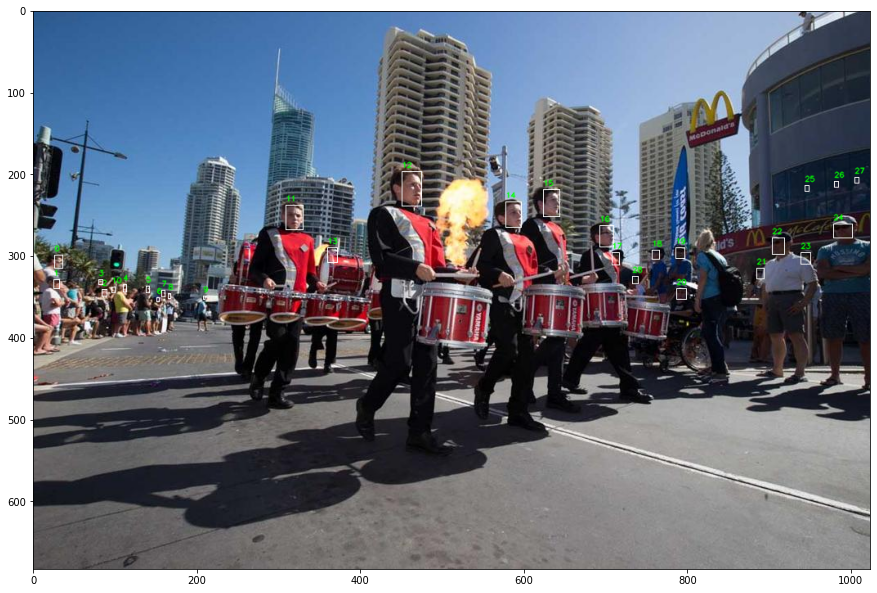

In [144]:
im = cv2.imread('WIDER_val/images/' + im_file)

display_objects(im, boxes, texts)